### **Week 3**

**DATASET** <br>
https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv <br>



**METADATA** <br>
application_id: Unique identifier for each application <br>
gender: Applicant's gender (Male, Female)<br>
international: International student (TRUE/FALSE)<br>
gpa: Grade Point Average of the applicant (on 4.0 scale)<br>
major: Undergraduate major (Business, STEM, Humanities)<br>
race: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other / null: international student)<br>
gmat: GMAT score of the applicant (800 points)<br>
work_exp: Number of years of work experience (Year)<br>
work_industry: Industry of the applicant's previous work experience (e.g., Consulting, Finance, Technology, etc.)<br>
admission: Admission status (Admit, Waitlist, Null: Deny)<br>

In [147]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt

1. display 5 columns from dataset

In [148]:
#1
df = pd.read_csv("https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv")
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


2. display the info column and conclude what the insight is from that column

In [149]:
#2
df = pd.read_csv("https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv")
df.info()

#Conclusion
#Dataset ini terdiri dari 6.194 baris dan 10 kolom, dengan beberapa kolom yang lengkap seperti application_id, gender, international, gpa, major, gmat, work_exp, dan work_industry. Namun, kolom race memiliki 1.842 data yang hilang, dan kolom admission memiliki 5.194 data yang hilang. Tipe data pada dataset ini sudah sesuai, dengan kolom application_id berupa integer, gpa, gmat, dan work_exp berupa float, sedangkan data kategoris seperti gender, major, race, work_industry, dan admission berupa objek. Kolom international menggunakan tipe boolean. Secara keseluruhan, dataset ini cukup efisien dengan penggunaan memori 441.7 KB, tetapi analisis mungkin terhambat oleh data yang hilang pada kolom race dan admission.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


3. display the number of each unique value in the race and admission columns (including NaN)

In [150]:
#3a
admission_counts = df['admission'].value_counts(dropna=False)

print("\nUnique values in 'admission' column:")
print(admission_counts)


Unique values in 'admission' column:
admission
NaN         5194
Admit        900
Waitlist     100
Name: count, dtype: int64


In [151]:
#3b
race_counts = df['race'].value_counts(dropna=False)

print("Unique values in 'race' column:")
print(race_counts)


Unique values in 'race' column:
race
NaN         1842
White       1456
Asian       1147
Black        916
Hispanic     596
Other        237
Name: count, dtype: int64


4. fill NaN values in admission column to "deny" and null values in in race column to "other"

In [152]:
#4
df['admission'].fillna('deny', inplace=True)
df['race'].fillna('other', inplace=True)

print(df[['race', 'admission']])

          race admission
0        Asian     Admit
1        Black      deny
2        other     Admit
3        Black      deny
4     Hispanic      deny
...        ...       ...
6189     White      deny
6190     Black      deny
6191     other     Admit
6192     other      deny
6193  Hispanic      deny

[6194 rows x 2 columns]


<ipython-input-152-1e9185077b35>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['admission'].fillna('deny', inplace=True)
<ipython-input-152-1e9185077b35>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

5. recheck missing value

In [153]:
#5
missing_values = df.isnull().sum()
(missing_values)

,0
application_id,0
gender,0
international,0
gpa,0
major,0
race,0
gmat,0
work_exp,0
work_industry,0
admission,0


6. drop application_id column

In [154]:
# 6
df.drop(columns=['application_id'], inplace=True)

print(df.head())

   gender  international   gpa       major      race   gmat  work_exp  \
0  Female          False  3.30    Business     Asian  620.0       3.0   
1    Male          False  3.28  Humanities     Black  680.0       5.0   
2  Female           True  3.30    Business     other  710.0       5.0   
3    Male          False  3.47        STEM     Black  690.0       6.0   
4    Male          False  3.35        STEM  Hispanic  590.0       5.0   

           work_industry admission  
0     Financial Services     Admit  
1  Investment Management      deny  
2             Technology     Admit  
3             Technology      deny  
4             Consulting      deny  


7. show describe column and conclude what the insight is from that column

In [155]:
#7
descriptive_stats = df[['gpa', 'gmat', 'work_exp']].describe()
descriptive_stats

#conclusion
#Berdasarkan hasil deskriptif statistik untuk kolom gpa, gmat, dan work_exp, dapat disimpulkan bahwa pelamar memiliki kualifikasi akademis dan profesional yang baik. Rata-rata GPA pelamar adalah 3.25, menunjukkan prestasi akademis yang solid, sementara rata-rata skor GMAT mencapai 651.09, mencerminkan kemampuan analitis dan kuantitatif yang kuat. Pengalaman kerja rata-rata sekitar 5 tahun, menunjukkan bahwa banyak pelamar memiliki latar belakang profesional yang signifikan sebelum melanjutkan pendidikan mereka. Dengan variasi yang terlihat dalam skor dan pengalaman, dataset ini menunjukkan bahwa program MBA menarik bagi individu yang sudah memiliki kombinasi latar belakang akademis dan pengalaman kerja yang kuat.

,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000
mean,3.250714,651.092993,5.016952
std,0.151541,49.294883,1.032432
min,2.650000,570.000000,1.000000
25%,3.150000,610.000000,4.000000
50%,3.250000,650.000000,5.000000
75%,3.350000,680.000000,6.000000
max,3.770000,780.000000,9.000000


8. make a visualization to analyze admission status based on major and explain the conclusions

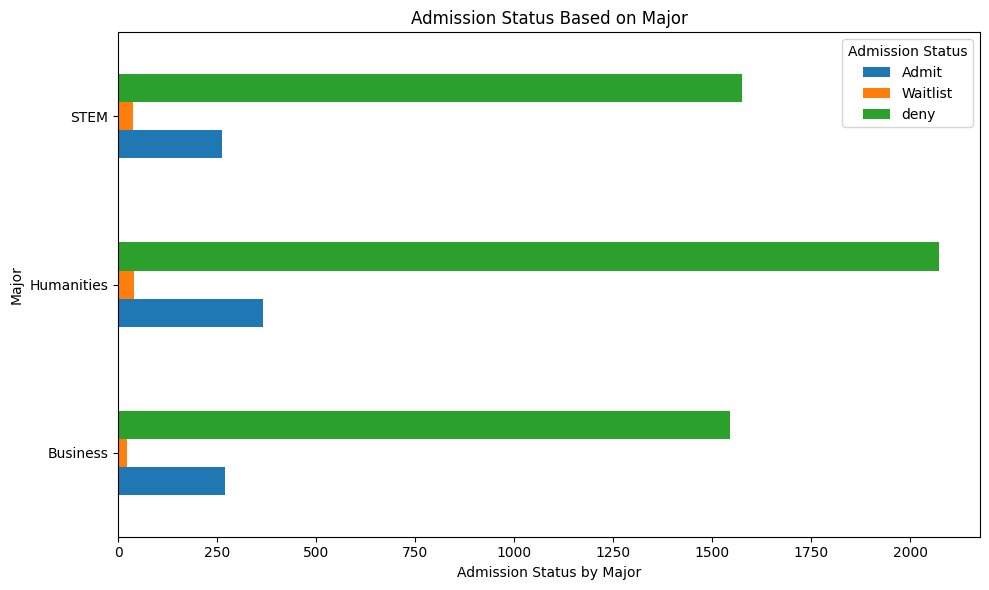

In [156]:
# 8
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

admission_major_count = df.groupby (['major','admission'])['admission'].count().unstack()
admission_major_count.plot (kind='barh', figsize=(10, 6))

plt.title('Admission Status Based on Major')
plt.xlabel('Admission Status by Major')
plt.ylabel('Major')
plt.legend(title='Admission Status')
plt.tight_layout()
plt.show()

#Grafik ini menunjukkan status penerimaan berdasarkan jurusan, di mana setiap batang menggambarkan jumlah pelamar yang diterima dan ditolak untuk setiap jurusan. Dari grafik ini, kita dapat melihat bahwa beberapa jurusan memiliki jumlah penerimaan yang tinggi, sementara yang lain menunjukkan lebih banyak penolakan, yang menunjukkan bahwa jurusan tertentu lebih sulit untuk diterima. Analisis ini memberikan pemahaman tentang jurusan yang lebih populer dan tantangan yang dihadapi pelamar.


9. make a visualization to analyze the admissions in each major based on gender and explain the conclusions

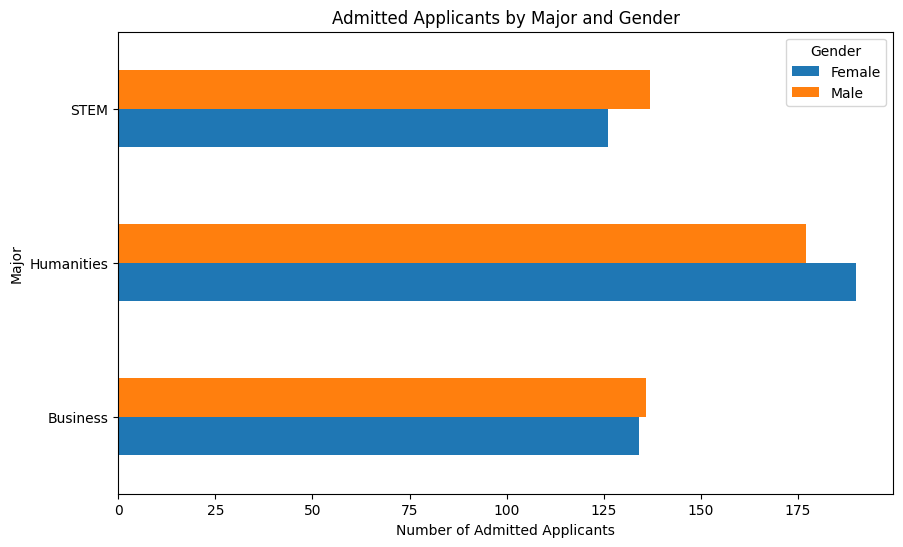

In [157]:
#9
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

admitted_df = df[df['admission'] == 'Admit']
admission_gender_count = admitted_df.groupby(['major', 'gender'])['gender'].count().unstack()
admission_gender_count.plot (kind='barh', figsize=(10, 6))

plt.title('Admitted Applicants by Major and Gender')
plt.xlabel('Number of Admitted Applicants')
plt.ylabel('Major')
plt.legend(title='Gender')
plt.show()

# Grafik ini menunjukkan jumlah pelamar yang diterima berdasarkan jurusan dan jenis kelamin, memperlihatkan perbedaan jumlah pelamar yang diterima antara gender dalam setiap jurusan. Beberapa jurusan mungkin menunjukkan ketidakseimbangan gender, dengan satu gender memiliki jumlah yang jauh lebih tinggi, mencerminkan minat yang berbeda terhadap bidang studi tertentu. Analisis ini membantu mengidentifikasi area di mana perlu ditingkatkan partisipasi gender yang kurang terwakili.


10. create your own insightful visualization and explain it in at least 2 sentences

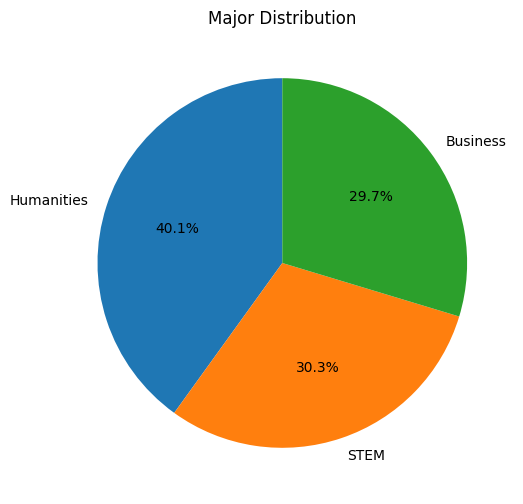

In [158]:
#10
major_count = df['major'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(major_count, labels=major_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Major Distribution')
plt.show()

#Pie chart tersebut menunjukkan distribusi pelamar berdasarkan jurusan, dengan jurusan yang terbesar paling diminati yaitu Humanities sebesar 40.1%, STEM sebesar 30.3% sementara jurusan yang kecil yaitu Business sebesar 29.7%.

11. create your own insightful visualization and explain it in at least 2 sentences

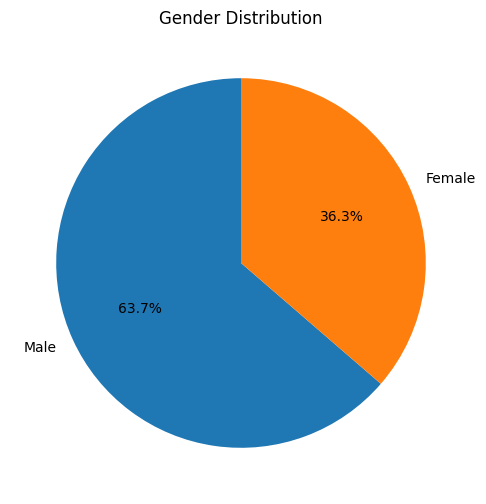

In [159]:
#11
gender_count = df['gender'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

#Pie chart ini menunjukkan distribusi pelamar berdasarkan jenis kelamin. Persentase yang lebih besar menunjukkan gender laki-laki sebesar 63.7% , sementara persentase yang lebih kecil yaitu perempuan sebesar 36.3%.

12. encode categorical columns and display the results

In [160]:
#12a
#encode X
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['gender'] = encoder.fit_transform(df['gender'])
df['international'] = encoder.fit_transform(df['international'])
df['major'] = encoder.fit_transform(df['major'])
df['race'] = encoder.fit_transform(df['race'])
df['work_exp'] = encoder.fit_transform(df['work_exp'])
df['work_industry'] = encoder.fit_transform(df['work_industry'])

df.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,2,3,Admit
1,1,0,3.28,1,1,680.0,4,6,deny
2,0,1,3.30,0,5,710.0,4,13,Admit
3,1,0,3.47,2,1,690.0,5,13,deny
4,1,0,3.35,2,2,590.0,4,1,deny


In [161]:
#12b
#encode y
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['admission'] = encoder.fit_transform(df['admission'])
df['admission'] = df['admission'].replace({2: 1})
df.head()


,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,2,3,0
1,1,0,3.28,1,1,680.0,4,6,1
2,0,1,3.30,0,5,710.0,4,13,0
3,1,0,3.47,2,1,690.0,5,13,1
4,1,0,3.35,2,2,590.0,4,1,1


13. create a heatmap to see the correlation and explain the conclusion

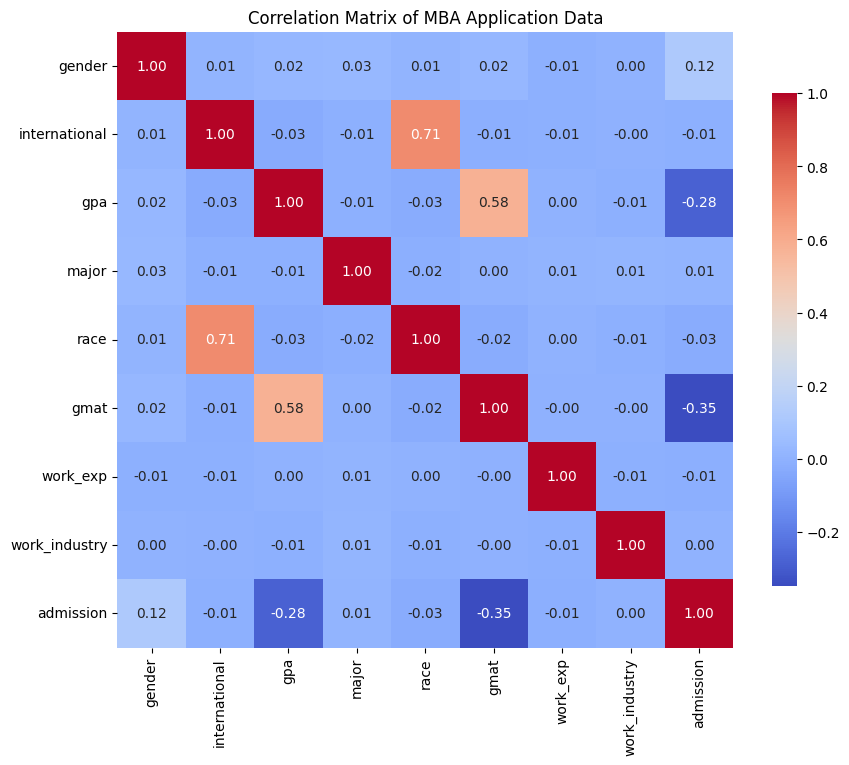

In [162]:
#13
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of MBA Application Data')

plt.show()


#Conclusion
# Heatmap ini menunjukkan koefisien korelasi antara variabel numerik dalam dataset, dengan nilai berkisar antara -1 hingga 1. Korelasi positif yang mendekati 1 menunjukkan bahwa saat satu variabel meningkat, variabel lain juga cenderung meningkat, sementara korelasi negatif yang mendekati -1 menunjukkan bahwa saat satu variabel meningkat, variabel lain cenderung menurun. Dengan demikian, analisis ini membantu mengidentifikasi hubungan antara berbagai faktor, seperti hubungan antara jumlah pelamar yang diterima dengan jurusan tertentu, serta faktor-faktor lain yang dapat mempengaruhi hasil penerimaan. Memahami korelasi ini sangat penting untuk pengambilan keputusan, baik bagi calon mahasiswa maupun institusi dalam merumuskan strategi penerimaan yang lebih efektif.

**Challenge! Get Extra 10 Points**<br>

get extra 10 points if you can help Lisa predict whether she will be accepted or not.
Lisa is a local student, Lisa's gpa is the average of all applicants, during her undergraduate Lisa studied entrepreneurship, Lisa has an Asian race, gmat score 580, has worked from 2018 to 2020 as a finance.

In [167]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = {
    'GPA': [3.2, 3.5, 3.7, 3.3, 3.6, 3.8, 3.1, 3.5, 3.4, 3.9, 3.0, 3.2, 3.5, 3.4, 3.7, 3.1],
    'GMAT': [550, 600, 580, 620, 640, 570, 560, 610, 590, 630, 550, 570, 600, 620, 640, 580],
    'Work_Experience': [2, 3, 5, 1, 4, 2, 3, 5, 1, 6, 0, 2, 4, 3, 5, 1],
    'Race': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],  # 0: Non-Asian, 1: Asian
    'Major': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],  # 0: Non-business, 1: Business
    'Accepted': [0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0]  # Target variable
}

df = pd.DataFrame(data)

X = df[['GPA', 'GMAT', 'Work_Experience', 'Race', 'Major']]
y = df['Accepted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


lisa_data = np.array([[3.5, 580, 2, 1, 1]])

lisa_prediction = model.predict(lisa_data)
acceptance = "Accepted" if lisa_prediction[0] == 1 else "Not Accepted"
print(f"Lisa's Prediction: {acceptance}")



Model Accuracy: 60.00%
Lisa's Prediction: Not Accepted


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
